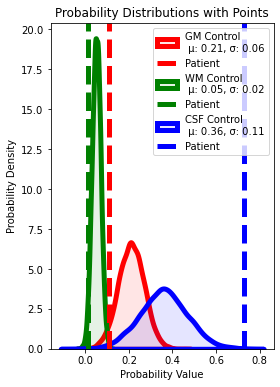

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data as per the provided table
data = {
    'Segment': ['GM', 'WM', 'CSF'],
    'Point': [0.11, 0.01, 0.73],
    'Mean': [0.21, 0.05, 0.36],
    'Stdev': [0.06, 0.02, 0.11]
}

# Number of points for the KDE
n_points = 10000

# Create a figure
plt.figure(figsize=(4, 6))

# Colors for each segment
colors = {'GM': 'red', 'WM': 'green', 'CSF': 'blue'}

# Generate the plots
for segment, color in colors.items():
    # Extracting the mean and stdev for each segment
    mean = data['Mean'][data['Segment'].index(segment)]
    stdev = data['Stdev'][data['Segment'].index(segment)]
    point = data['Point'][data['Segment'].index(segment)]
    
    # Generate random data from a normal distribution
    values = np.random.normal(loc=mean, scale=stdev, size=n_points)
    
    # Plot KDE
    sns.kdeplot(values, color=color, fill=True, alpha=0.1, linewidth=5, label=f'{segment} Control \n μ: {mean}, σ: {stdev}')
    
    # Add a vertical line for the point
    plt.axvline(x=point, color=color, linestyle='--', linewidth=5, label='Patient')

# Add legend and titles
plt.legend()
plt.title('Probability Distributions with Points')
plt.xlabel('Probability Value')
plt.ylabel('Probability Density')
plt.savefig('/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/Figures/methods_explanation/KDE.svg')

# Show the plot
plt.show()

